# Example 10

In [1]:
import gemgis as gg

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import geopandas as gpd
import rasterio 

In [3]:
topo = gpd.read_file('topo10.shp')
topo.head()

,id,Z,geometry
0,None,600,"LINESTRING (500.103 2733.663, 594.070 2684.564..."
1,None,500,"LINESTRING (217.356 2726.044, 324.445 2643.506..."
2,None,400,"LINESTRING (11.222 2589.327, 69.634 2556.312, ..."
3,None,900,"LINESTRING (1037.237 1522.677, 1083.798 1526.9..."
4,None,800,"LINESTRING (912.795 1610.718, 990.677 1620.030..."


In [4]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=10)


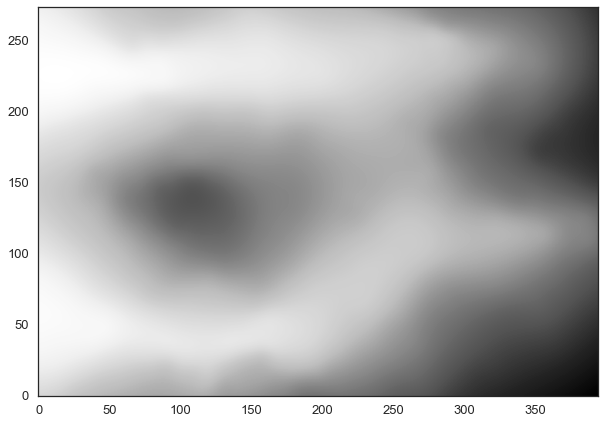

In [5]:
import matplotlib.pyplot as plt
plt.imshow(topo_raster, origin='lower')

In [6]:
topo_raster = rasterio.open('raster10.tif')

In [7]:
interfaces = gpd.read_file('interfaces10.shp')
interfaces

,id,formation,geometry
0,None,F1,"LINESTRING (1263.266 2736.203, 1170.145 1.855)"
1,None,F2,"LINESTRING (2839.537 2736.203, 3198.049 1.855)"
2,None,B,"LINESTRING (128.046 2733.240, 211.007 2641.813..."
3,None,B,"LINESTRING (3.603 1339.823, 67.941 1234.851, 1..."
4,None,C,"LINESTRING (681.688 2.279, 724.862 66.616, 789..."
5,None,C,"LINESTRING (383.703 2734.087, 470.051 2657.897..."
6,None,B,"LINESTRING (1424.956 2505.519, 1504.532 2468.2..."
7,None,C,"LINESTRING (1676.381 2733.240, 1769.501 2651.9..."
8,None,B,"LINESTRING (1297.127 727.770, 1431.728 664.279..."
9,None,D,"LINESTRING (1217.552 1834.207, 1134.590 1774.9..."


In [8]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
interfaces_coords = interfaces_coords[interfaces_coords['formation'].isin(['F1', 'F2', 'C','B','D', 'G','H'])] 
interfaces_coords.head()

,formation,geometry,X,Y,Z
322,H,POINT (2940.276 1706.378),2940.28,1706.38,814.55
371,H,POINT (3262.810 1592.094),3262.81,1592.09,879.04
369,H,POINT (3188.314 1716.537),3188.31,1716.54,888.36
368,H,POINT (3162.071 1769.023),3162.07,1769.02,887.87
367,H,POINT (3148.526 1840.979),3148.53,1840.98,889.10


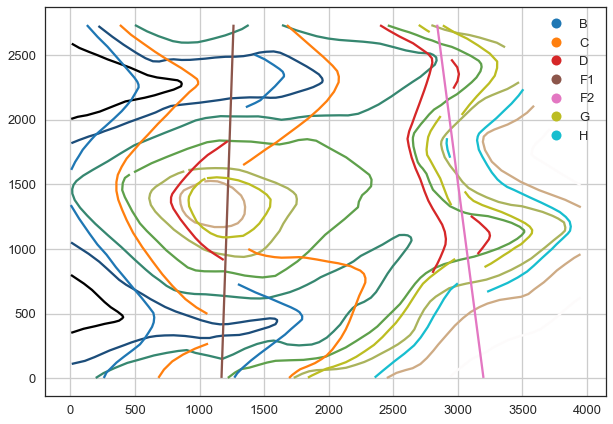

In [9]:
fig, ax = plt.subplots(1)

topo.plot(ax=ax, column='Z', cmap='gist_earth', aspect='equal')
interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')

plt.grid()

In [10]:
strikes = gpd.read_file('strikes10.shp')
strikes.head()

,id,formation,Z,geometry
0,1.00,B,400,"LINESTRING (416.718 2417.478, 467.511 2152.509)"
1,2.00,B,500,"LINESTRING (216.087 1913.782, 39.158 2721.388)"
2,NaN,B1,500,"LINESTRING (505.606 676.130, 576.716 313.808)"
3,1.00,C,500,"LINESTRING (751.105 2464.038, 832.373 2115.261)"
4,2.00,C,600,"LINESTRING (549.626 1825.741, 375.238 2734.933)"


In [11]:
orientations_f1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='F1'].sort_values(by='Z', ascending=True).reset_index())
orientations_f1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,89.75,91.97,1000.00,POINT (1216.176 1369.029),1.00,F1,1216.18,1369.03


In [12]:
orientations_f2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='F2'].sort_values(by='Z', ascending=True).reset_index())
orientations_f2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,89.75,82.52,1000.00,POINT (3018.793 1368.818),1.00,F2,3018.79,1368.82


In [13]:
orientations_c2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C2'].sort_values(by='Z', ascending=True).reset_index())
orientations_c2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,16.56,76.45,650.00,POINT (1845.267 1413.896),1.00,C2,1845.27,1413.90
1,17.33,76.32,750.00,POINT (1524.849 1332.628),1.00,C2,1524.85,1332.63


In [14]:
orientations_c = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C'].sort_values(by='Z', ascending=True).reset_index())
orientations_c

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,17.45,78.85,550.00,POINT (627.085 2284.993),1.00,C,627.09,2284.99


In [15]:
orientations_c1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='C1'].sort_values(by='Z', ascending=True).reset_index())
orientations_c1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,16.85,76.63,650.00,POINT (2029.391 637.612),1.00,C1,2029.39,637.61


In [16]:
orientations_b = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='B'].sort_values(by='Z', ascending=True).reset_index())
orientations_b

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,18.63,77.79,450.00,POINT (284.869 2301.289),1.00,B,284.87,2301.29


In [17]:
orientations_g = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation']=='G'].sort_values(by='Z', ascending=True).reset_index())
orientations_g

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,6.00,90.92,750.00,POINT (2481.976 1233.264),1.00,G,2481.98,1233.26


In [18]:
import pandas as pd
orientations = pd.concat([orientations_f1, orientations_f2, orientations_c2, orientations_c, orientations_c1, orientations_b, orientations_g]).reset_index()
orientations['formation'] = ['F1', 'F2', 'C', 'C','C', 'C','B', 'G']
orientations = orientations[orientations['formation'].isin(['F1', 'F2', 'C', 'B', 'G'])]
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,89.75,91.97,1000.00,POINT (1216.176 1369.029),1.00,F1,1216.18,1369.03
1,0,89.75,82.52,1000.00,POINT (3018.793 1368.818),1.00,F2,3018.79,1368.82
2,0,16.56,76.45,650.00,POINT (1845.267 1413.896),1.00,C,1845.27,1413.90
3,1,17.33,76.32,750.00,POINT (1524.849 1332.628),1.00,C,1524.85,1332.63
4,0,17.45,78.85,550.00,POINT (627.085 2284.993),1.00,C,627.09,2284.99
5,0,16.85,76.63,650.00,POINT (2029.391 637.612),1.00,C,2029.39,637.61
6,0,18.63,77.79,450.00,POINT (284.869 2301.289),1.00,B,284.87,2301.29
7,0,6.00,90.92,750.00,POINT (2481.976 1233.264),1.00,G,2481.98,1233.26


In [19]:
import numpy as np 
orientations['dip'] = np.abs(orientations['dip'].values)
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,89.75,91.97,1000.00,POINT (1216.176 1369.029),1.00,F1,1216.18,1369.03
1,0,89.75,82.52,1000.00,POINT (3018.793 1368.818),1.00,F2,3018.79,1368.82
2,0,16.56,76.45,650.00,POINT (1845.267 1413.896),1.00,C,1845.27,1413.90
3,1,17.33,76.32,750.00,POINT (1524.849 1332.628),1.00,C,1524.85,1332.63
4,0,17.45,78.85,550.00,POINT (627.085 2284.993),1.00,C,627.09,2284.99
5,0,16.85,76.63,650.00,POINT (2029.391 637.612),1.00,C,2029.39,637.61
6,0,18.63,77.79,450.00,POINT (284.869 2301.289),1.00,B,284.87,2301.29
7,0,6.00,90.92,750.00,POINT (2481.976 1233.264),1.00,G,2481.98,1233.26


In [20]:
import gempy as gp

In [21]:
geo_model = gp.create_model('Model10')
geo_model

Model10  2021-03-25 20:46

In [22]:
gp.init_data(geo_model, [0,3954,0,2738,0,1000], [50,50,75],
             surface_points_df = interfaces_coords[interfaces_coords['Z']!=0],
             orientations_df = orientations,
             default_values=True)

Active grids: ['regular']


Model10  2021-03-25 20:46

In [23]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,H,Default series,1,#015482,1
1,G,Default series,2,#9f0052,2
2,F2,Default series,3,#ffbe00,3
3,F1,Default series,4,#728f02,4
4,D,Default series,5,#443988,5
5,C,Default series,6,#ff3f20,6
6,B,Default series,7,#5DA629,7


In [24]:
gp.map_stack_to_surfaces(geo_model,
                         {
                            
                          'Fault1': ('F1'),
                          'Fault2': ('F2'),  
                          'Strata2': ('H','G'),   
                      'Strata1': ('D','C', 'B'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')
geo_model.set_is_fault(['Fault1', 'Fault2'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Strata2,3,Erosion,True,False,False
Strata1,4,Erosion,True,False,False


In [25]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
3,F1,Fault1,1,#527682,1,2,1
2,F2,Fault2,1,#527682,2,2,1
0,H,Strata2,1,#ffbe00,3,55,0
1,G,Strata2,2,#728f02,4,100,1
4,D,Strata1,1,#443988,5,65,0
5,C,Strata1,2,#ff3f20,6,96,4
6,B,Strata1,3,#5DA629,7,79,1
7,Basement,Strata1,4,#4878d0,8,0,0


In [26]:
geo_model.set_topography(
    source='gdal', filepath='raster10.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  39.54      ,   27.38      ,    6.66666667],
       [  39.54      ,   27.38      ,   20.        ],
       [  39.54      ,   27.38      ,   33.33333333],
       ...,
       [3948.99493671, 2713.01824818, 1023.34295654],
       [3948.99493671, 2723.01094891, 1024.94226074],
       [3948.99493671, 2733.00364964, 1026.57104492]])

In [27]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                        values
range                 4912.31
$C_o$                574541.9
drift equations  [3, 3, 3, 3]


In [28]:
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\gempy\core\solution.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.geological_map = np.array([values[0][:, l0: l1], values[4][:, l0: l1].astype(float)])


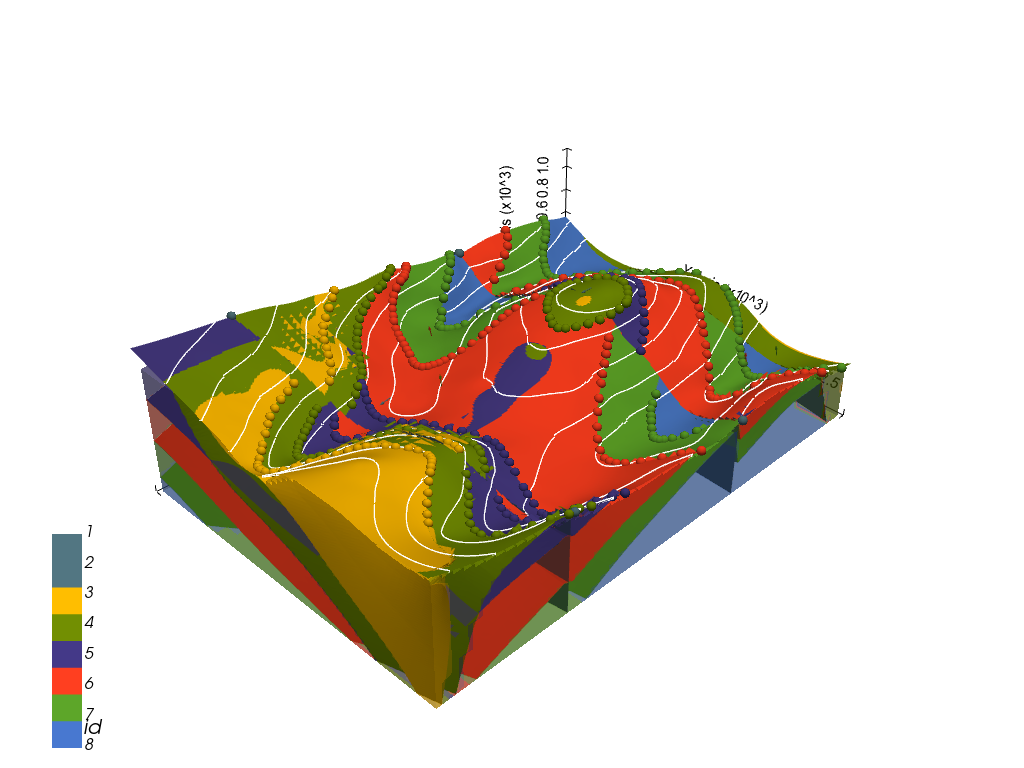

In [30]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)